# mouse viral study(SVC)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("D:\\tala\\mashin learning\\mouse_viral_study.csv")
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [4]:
df["Virus Present"].value_counts()

0    200
1    200
Name: Virus Present, dtype: int64

<AxesSubplot:xlabel='Med_1_mL', ylabel='Density'>

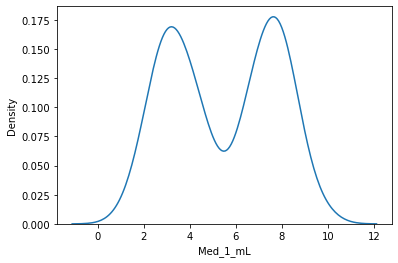

In [5]:
sns.kdeplot(df["Med_1_mL"])

<AxesSubplot:xlabel='Med_2_mL', ylabel='Density'>

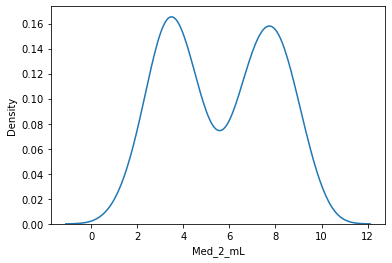

In [6]:
sns.kdeplot(df["Med_2_mL"])

<AxesSubplot:xlabel='Med_1_mL', ylabel='Med_2_mL'>

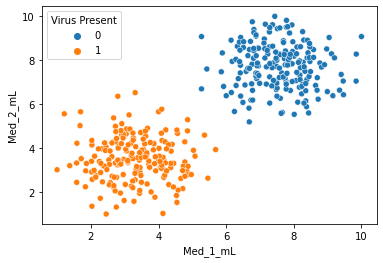

In [7]:
sns.scatterplot(data=df , x="Med_1_mL",y="Med_2_mL" , hue="Virus Present")

In [8]:
inputs=df.drop(["Virus Present"] , axis=1)
target=df["Virus Present"]

In [13]:
from sklearn.model_selection import train_test_split

x_train ,x_test , y_train , y_test=train_test_split(inputs , target , test_size=0.1 , random_state=42)

In [19]:
from sklearn.svm import SVC

svc=SVC(kernel="linear" , C=1000)
svc.fit(x_train , y_train)

SVC(C=1000, kernel='linear')

In [20]:
from sklearn.model_selection import GridSearchCV

svc=SVC()

param_grid={"C":[0.01 , 0.1 ,1] , "kernel":["libnear","rbf"]}

grid=GridSearchCV(svc , param_grid)
grid.fit(x_train , y_train)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\svm\_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Anaconda\lib\site-packages\sklearn\svm\_base.py", line 315, in _dense_fit
    ) = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 173, in sklearn.svm._libsvm.fit
ValueError: 'l

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['libnear', 'rbf']})

In [21]:
grid.best_params_

{'C': 0.01, 'kernel': 'rbf'}

In [22]:
svc_pred=grid.predict(x_test)

In [23]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,svc_pred)

1.0

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test , svc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        17

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


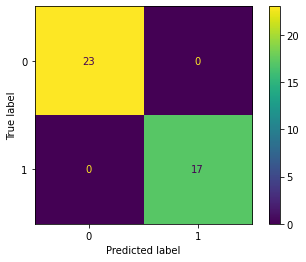

In [25]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(grid , x_test , y_test)